In [1]:
#@title 1. Install and set up Python 3.11 {display-mode: "form"}
# Credits to JanEricNitschke in https://github.com/pnxenopoulos/awpy/issues/248#issuecomment-1575170156

#The code below installs 3.11 (assuming you now have 3.10) and restarts environment, so you can run your cells.
import sys #for version checker
import os #for restart routine

if '3.11' in sys.version:
  print('You already have 3.11, nothing to install')
elif '3.10' in sys.version:
  print("Python version is: ", sys.version)

  print("Printing content of /usr/local/lib/python* to see available versions")
  !ls /usr/local/lib/python*

  #install python 3.11 and dev utils
  #you may not need all the dev libraries, but I haven't tested which aren't necessary.
  !sudo apt-get update -y > /dev/null
  !sudo apt-get install python3.11 python3.11-dev python3.11-distutils libpython3.11-dev > /dev/null
  !sudo apt-get install python3.11-venv binfmt-support  > /dev/null #recommended in install logs of the command above

  #change alternatives
  !sudo update-alternatives --install /usr/bin/python3 python3 /usr/bin/python3.10 1 > /dev/null
  !sudo update-alternatives --install /usr/bin/python3 python3 /usr/bin/python3.11 2 > /dev/null

  # install pip
  !curl -sS https://bootstrap.pypa.io/get-pip.py | python3.11  > /dev/null

  #install colab's dependencies
  !python3 -m pip install ipython==7.9.0 traitlets==5.7.1 jupyter psutil matplotlib setuptools ipython_genutils ipykernel jupyter_console notebook prompt_toolkit httplib2 astor  > /dev/null

  #minor cleanup
  !sudo apt autoremove > /dev/null

  #link to the old google package
  !ln -s /usr/local/lib/python3.10/dist-packages/google /usr/local/lib/python3.11/dist-packages/google > /dev/null

  #this is just to verify if 3.11 folder was indeed created
  print("Printing content of /usr/local/lib/python3.11/")
  !ls /usr/local/lib/python3.11/

  #restart environment so you don't have to do it manually
  os.kill(os.getpid(), 9)
else:
  print("Your out of the box Python is not 3.10, so probably the script will not work, so pls feel free to edit the script to ignore then check and re-run: ", sys.version)
     

You already have 3.11, nothing to install


In [2]:
#@title 3. Install repo dependencies
%cd ../Week 4/text-to-image-eval
!pip install poetry
!poetry config virtualenvs.in-project true # Configure Poetry to create virtual environments in the project folder
!poetry add ipykernel # Resolve Colab specific missing dependency
!poetry install --no-ansi

sys.path.insert(0, '/Week 4/text-to-image-eval/.venv/lib/python3.11/site-packages')

G:\USER\Documents\GitHub\QL4POMR\Week 4\text-to-image-eval


G:\anaconda3\envs\ModeEval\Lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]



You can only pass one value.


Using version ^6.29.5 for ipykernel



'files'


Installing dependencies from lock file

Package operations: 0 installs, 1 update, 0 removals

  - Updating idna (3.7 C:/b/abs_aad84bnnw5/croot/idna_1714398896795/work -> 3.7)

Installing the current project: tti-eval (0.1.0)


In [3]:
!poetry run tti-eval list --all

Available datasets are: Alzheimer-MRI, chest-xray-classification, LungCancer4Types, plants, rsicd, skin-cancer, sports-classification
Available models are: apple, bioclip, biomedclip-pubmedbert, biomedclip-pubmedbert-chuhac, clip, clipmd, eva-clip, fashion, m3d-clip, medclip, plip, pubmed, rsicd, rsicd-encord, siglip_large, siglip_small, street, tinyclip, vit-b-32-laion2b


	Pubmed CLIP: 
	https://huggingface.co/flaviagiammarino/pubmed-clip-vit-base-patch32
	ClipMD: https://huggingface.co/Idan0405/ClipMD
	MedCLIP: https://discuss.huggingface.co/t/medclip-pretraining-clip-on-medical-data/7316
	M3D-CLIP: https://huggingface.co/GoodBaiBai88/M3D-CLIP
	BiomedCLIP-PubMedBERT: https://huggingface.co/microsoft/BiomedCLIP-PubMedBERT_256-vit_base_patch16_224
	BioCLIP: https://huggingface.co/imageomics/bi
Alzheimer
Chest ray
Lung cancer 
Skin cancer
oclip


Training: 

These are all the training commands, commented out so we dont re-train every time.

!poetry run tti-eval build --model-dataset pubmed/Alzheimer-MRI 

!poetry run tti-eval build --model-dataset clipmd/Alzheimer-MRI 

This one is not supported by tti eval 

!poetry run tti-eval build --model-dataset medclip/Alzheimer-MRI 

This one is not supported by tti eval 

!poetry run tti-eval build --model-dataset m3d-clip/Alzheimer-MRI 

!poetry run tti-eval build --model-dataset biomedclip-pubmedbert-chuhac/Alzheimer-MRI 

!poetry run tti-eval build --model-dataset bioclip/Alzheimer-MRI 

!poetry run tti-eval build --model-dataset pubmed/chest-xray-classification

!poetry run tti-eval build --model-dataset pubmed/skin-cancer

!poetry run tti-eval build --model-dataset pubmed/LungCancer4Types

!poetry run tti-eval build --model-dataset clipmd/chest-xray-classification

!poetry run tti-eval build --model-dataset clipmd/skin-cancer

!poetry run tti-eval build --model-dataset clipmd/LungCancer4Types

!poetry run tti-eval build --model-dataset biomedclip-pubmedbert-chuhac/chest-xray-classification

!poetry run tti-eval build --model-dataset biomedclip-pubmedbert-chuhac/skin-cancer

!poetry run tti-eval build --model-dataset biomedclip-pubmedbert-chuhac/LungCancer4Types

!poetry run tti-eval build --model-dataset bioclip/chest-xray-classification

!poetry run tti-eval build --model-dataset bioclip/skin-cancer

!poetry run tti-eval build --model-dataset bioclip/LungCancer4Types

Evaluations:

In [4]:
raw_data = !poetry run tti-eval evaluate \
  --model-dataset pubmed/Alzheimer-MRI \
  --model-dataset clipmd/Alzheimer-MRI \
  --model-dataset biomedclip-pubmedbert-chuhac/Alzheimer-MRI \
  --model-dataset bioclip/Alzheimer-MRI \
  --model-dataset pubmed/chest-xray-classification \
  --model-dataset clipmd/chest-xray-classification \
  --model-dataset biomedclip-pubmedbert-chuhac/chest-xray-classification \
  --model-dataset bioclip/chest-xray-classification \
  --model-dataset pubmed/LungCancer4Types \
  --model-dataset clipmd/LungCancer4Types \
  --model-dataset biomedclip-pubmedbert-chuhac/LungCancer4Types \
  --model-dataset bioclip/LungCancer4Types \
  --model-dataset pubmed/skin-cancer \
  --model-dataset clipmd/skin-cancer \
  --model-dataset biomedclip-pubmedbert-chuhac/skin-cancer \
  --model-dataset bioclip/skin-cancer

In [5]:
import re
import csv
import os
# Extract data sections
sections = {
    'zero_shot': [],
    'linear_probe': [],
    'wKNN': [],
    'I2IR': []
}

current_section = None
for line in raw_data:
    if '===== zero_shot =====' in line:
        current_section = 'zero_shot'
    elif '===== linear_probe =====' in line:
        current_section = 'linear_probe'
    elif '===== wKNN =====' in line:
        current_section = 'wKNN'
    elif '===== I2IR =====' in line:
        current_section = 'I2IR'
    elif current_section and (line.startswith('Model/Dataset') or line.startswith('----------------------------') or re.match(r'^\w', line)):
        sections[current_section].append(line)

# Define the directory to save CSV files
output_dir = '../Model Evaluations'  # Adjust this path as per your setup

# Ensure the directory exists; create if it doesn't
os.makedirs(output_dir, exist_ok=True)

# Write data to CSV files
for section, data in sections.items():
    if data:
        filename = os.path.join(output_dir, f'{section}.csv')
        # Open the file in write mode ('w') with newline='' to manage line endings
        with open(filename, 'w', newline='') as csvfile:
            writer = csv.writer(csvfile)
            for i, row in enumerate(data):
                # Skip the first and last rows
                if i != 0 and i != len(data) - 1:
                    # Split the row by spaces and filter out empty strings
                    writer.writerow([cell for cell in re.split(r'\s{2,}', row) if cell])

print("CSV files created or updated successfully in the specified directory.")

CSV files created or updated successfully in the specified directory.


In [13]:
import pandas as pd
import os

# List of sections (file names without extension)
sections = ['zero_shot', 'linear_probe', 'wKNN', 'I2IR']

# Dictionary to hold DataFrames for each section
dfs = {}
for section in sections:
    filename = f'../Model Evaluations/{section}.csv'
    if os.path.exists(filename):
        dfs[section] = pd.read_csv(filename, skipinitialspace=True)
    else:
        print(f"Warning: File '{filename}' not found.")

In [14]:
dfs['zero_shot']

,Model/Dataset,Alzheimer-MRI,chest-xray-classification,LungCancer4Types,skin-cancer
0,bioclip,0.3086,0.7356,0.1867,0.0486
1,biomedclip-pubmedbert-chuhac,0.4518,0.7785,0.2600,0.1549
2,clipmd,0.4948,0.7391,0.2133,0.1124
3,pubmed,0.3047,0.7760,0.2467,0.1140


In [44]:
dfs['linear_probe']

,Alzheimer-MRI,chest-xray-classification,LungCancer4Types,skin-cancer
Model/Dataset,,,,
bioclip,0.6094,0.9579,0.5933,0.8218
biomedclip-pubmedbert-chuhac,0.5664,0.9579,0.6467,0.7652
clipmd,0.5651,0.9536,0.5800,0.7640
pubmed,0.5521,0.9356,0.4800,0.7480


In [45]:
dfs['wKNN']

,Alzheimer-MRI,chest-xray-classification,LungCancer4Types,skin-cancer
Model/Dataset,,,,
bioclip,0.9232,0.9425,0.6333,0.9735
biomedclip-pubmedbert-chuhac,0.8438,0.9528,0.5867,0.9727
clipmd,0.7891,0.9185,0.5000,0.9663
pubmed,0.8789,0.9373,0.4867,0.9679


In [46]:
dfs['I2IR']

,Alzheimer-MRI,chest-xray-classification,LungCancer4Types,skin-cancer
Model/Dataset,,,,
bioclip,0.4349,0.8504,0.3535,0.6267
biomedclip-pubmedbert-chuhac,0.4263,0.8699,0.2596,0.6314
clipmd,0.4126,0.7942,0.2887,0.5991
pubmed,0.4255,0.8182,0.3242,0.6199


In [48]:
def plot_dataframes(dictionary_of_dataframes):
    # Define the categories and positions for the bars
    categories = ['Alzheimer-MRI', 'chest-xray-classification', 'LungCancer4Types', 'skin-cancer']
    positions = np.arange(len(categories))
    bar_width = 0.2  # Width of the bars

    for key, df in dictionary_of_dataframes.items():
        plt.figure(figsize=(10, 6))
        
        # Scale scores to 0-100 range
        scaled_df = df.copy()
        for col in categories:
            scaled_df[col] = df[col] * 100
        
        # Plot each category as a bar group
        for i, col in enumerate(categories):
            plt.bar(positions + i * bar_width, scaled_df[col], width=bar_width, label=col)

        plt.xlabel('Models')
        plt.ylabel('Score %')
        plt.title(f'{key}')
        plt.xticks(positions + bar_width * 1.5, df.index)  # Set x-axis ticks to index of DataFrame
        plt.ylim(0, 100)  # Set y-axis limits from 0 to 100
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

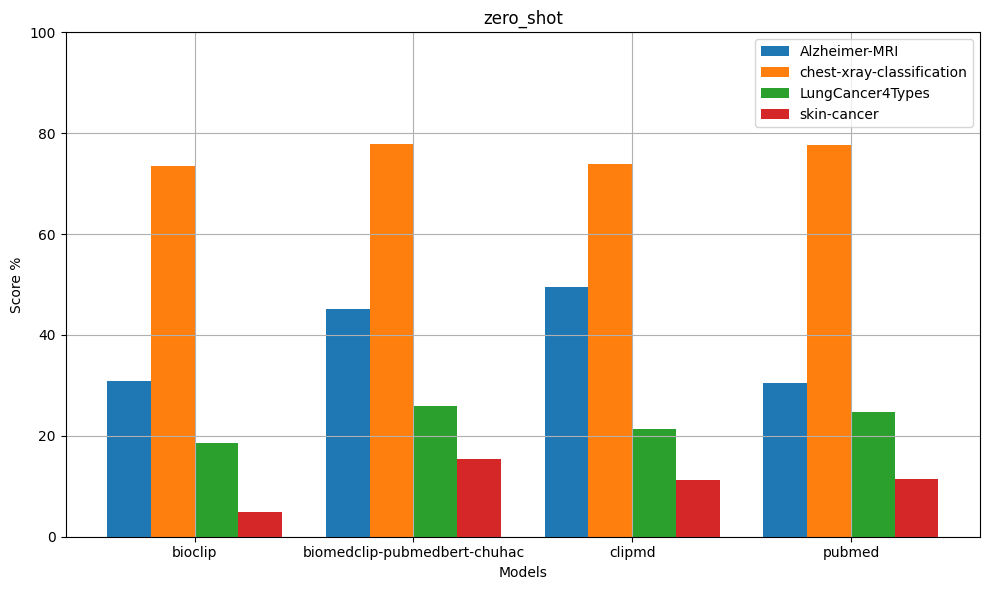

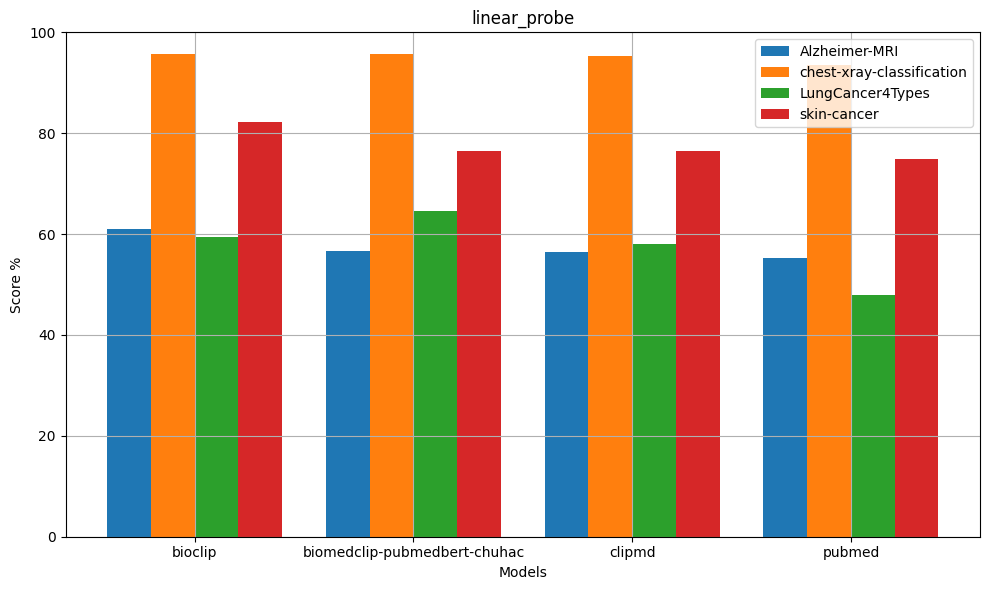

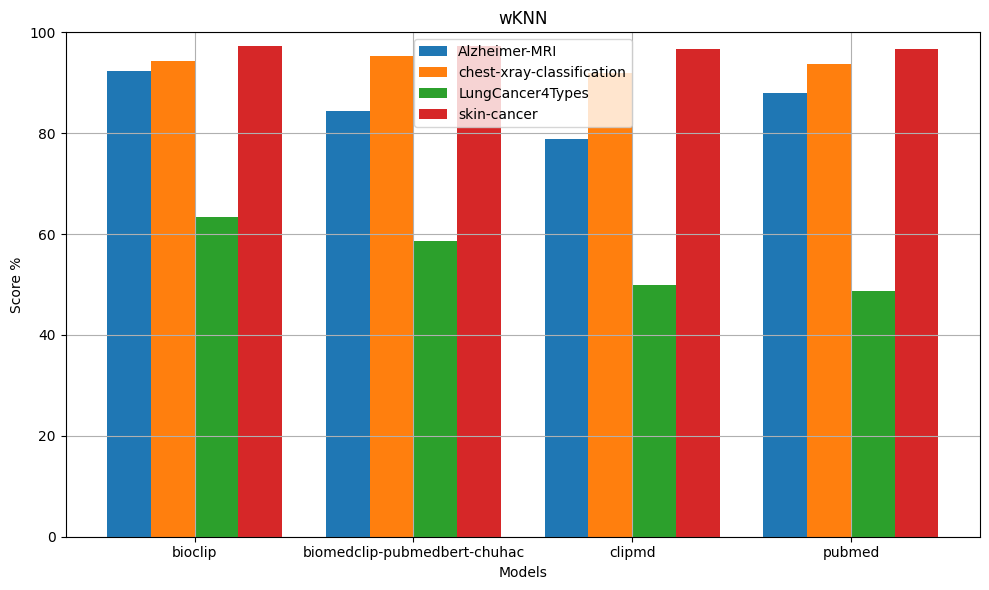

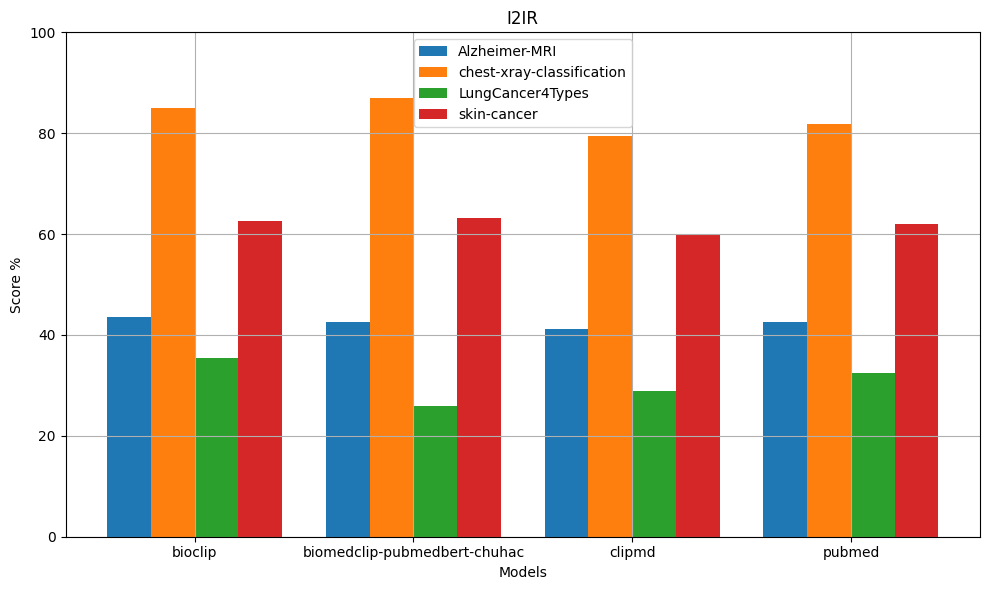

In [49]:
plot_dataframes(dfs)